In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Import the dataset

In [2]:
from keras.datasets import mnist

In [3]:
(data, labels), _ = mnist.load_data()

In [4]:
# Get some info about our data
type(data)

numpy.ndarray

In [8]:
data.shape

(60000, 28, 28)

In [9]:
labels.shape

(60000,)

## Filter data to classify only 0 and 1 and Split data to train and test 

In [10]:
filter = np.where((labels == 0) | (labels == 1))
X = data[filter]
y = labels[filter]

In [33]:
print(f"Data:\t{X.shape}\nLabels:\t{y.shape}")

Data:	(12665, 28, 28)
Labels:	(12665,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
def display(i):
    img = X_train[i]
    plt.title('Example No:%d. Label: %d' % (i, y_train[i]))
    plt.imshow(img, cmap=plt.cm.gray_r)

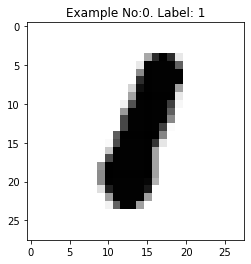

In [15]:
display(0)

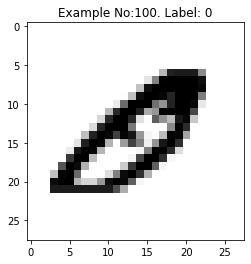

In [16]:
display(100)

## Create the model

In [17]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(2, activation='softmax'))

## Compile model

In [18]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
X_train = X_train.reshape((len(X_train), 28*28))
X_train = X_train.astype('float32') /255

X_test = X_test.reshape((len(X_test), 28*28))
X_test = X_test.astype('float32') /255

In [20]:
X_train.shape

(10132, 784)

## Train the model

In [22]:
from keras.utils import to_categorical

In [23]:
network.fit(X_train, to_categorical(y_train), epochs=5, batch_size=10)

Epoch 1/5
10132/10132 [==============================] - 4s 418us/step - loss: 0.0086 - accuracy: 0.9980
Epoch 2/5
10132/10132 [==============================] - 4s 436us/step - loss: 0.0048 - accuracy: 0.9992
Epoch 3/5
10132/10132 [==============================] - 4s 429us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 4/5
10132/10132 [==============================] - 5s 466us/step - loss: 0.0026 - accuracy: 0.9996
Epoch 5/5
10132/10132 [==============================] - 5s 518us/step - loss: 0.0022 - accuracy: 0.9997


In [24]:
test_loss, test_acc = network.evaluate(X_test, to_categorical(y_test))

2533/2533 [==============================] - 0s 68us/step


In [32]:
print(f"Test loss:\t{round(test_loss, 4)}\nTest accuracy:\t{round(test_acc, 4)}")

Test loss:	0.0129
Test accuracy:	0.9988


In [34]:
predictions = network.predict(X_test)

In [37]:
np.argmax(predictions[0])

1

In [38]:
y_train[0]

1

In [56]:
print(f"{np.argmax(predictions[:5], axis=1)} Predicted values")
print(f"{y_test[:5]} Actual values")

[1 1 0 0 1] Predicted values
[1 1 0 0 1] Actual values


Index: 100, Label: 1, Predicted: 1


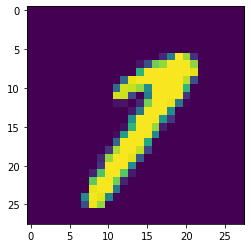

In [68]:
print('Index: 100, Label: {}, Predicted: {}'.format(y_test[100], np.argmax(predictions[100])))
plt.imshow(X_test[100].reshape((28 , 28)))